In [38]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
sns.set_style('darkgrid')

In [42]:
def ten_pow(n): return 10 ** n

In [43]:
path = 'filtro_passa_baixa/'

v_1 = np.array([0.2137, 1.717, 3.181, 4.770, 6.250, 7.710, 9.220, 10.73, 12.30, 13.8, 28.57, 27.07, 25.5, 24.1, 22.71, 21.2, 19.72, 18.25, 16.71, 15.22])
delta_t_over_T_1 = np.array([0.0000, -6.896e-4, -0.05031, -0.04761, -0.05625, -0.06870, -0.07407, -0.09677, -0.09876, -0.1153, 0.1724, 0.1538, 0.1632, 0.1456, 0.1532, 0.1441, 0.1373, 0.1273, 0.1333, 0.1194])
v_0_1 = np.array([6880, 5840, 4560, 2920, 2900, 2500, 2220, 2000, 1860, 1740, 1360, 1380, 1380, 1360, 1380, 1400, 1420, 1460, 1520, 1620])
v_c0_1 = np.array([6920, 5680, 4400, 2720, 2640, 2220, 1900, 1660, 1460, 1300, 680, 720, 740, 760, 800, 860, 900, 960, 1040, 1180])

v_2 = np.array([15.60, 16.01, 16.35, 17.00, 17.55, 17.91, 18.6, 18.92, 19.33, 20.11, 14.94, 14.54, 14.1, 13.5, 13.04, 12.63, 12.03, 11.52, 11.06, 10.35])
delta_t_over_T_2 = np.array([-0.07917, -0.08444, -0.08735, -0.09156, -0.1000, -0.1008, -0.1027, -0.1061, -0.1053, -0.1131, .1452, 0.1395, 0.1353, 0.1343, 0.1286, 0.1259, 0.1284, 0.1234, 0.1146, 0.1132])[::-1]
v_0_2 = np.array([6240, 6000, 5920, 5920, 5600, 5600, 5440, 5360, 5200, 5200, 4560, 4720, 4720, 4720, 4720, 4880, 4880, 4960, 4960, 5120])[::-1]
v_c0_2 = np.array([5200, 4880, 4640, 4560, 4420, 4240, 4080, 3920, 3660, 3680, 2800, 2960, 3040, 3040, 3120, 3200, 3280, 3440, 3440, 3520])[::-1]

R_teorico = 10
C_teorico = 1e-6
R_chute = 10.2
C_chute = 1.015
v_corte = 1 / (2 * np.pi * R_chute * C_chute)

# Table 1

In [19]:
df_1 = pd.DataFrame({
    'v [kHz]' : v_1,
    'delta_t / T' : delta_t_over_T_1,
    'v_0 [mV]' : v_0_1,
    'v_c0 [mV]': v_c0_1
}).sort_values(by='v [kHz]')

In [20]:
df_1['delta_t / T'] = np.abs(df_1['delta_t / T'])
df_1['x'] = (df_1['v [kHz]'] / v_corte) / 1000
df_1['v_cred'] = df_1['v_c0 [mV]'] / df_1['v_0 [mV]']
df_1['tg(alpha)'] = np.tan(df_1['delta_t / T'] * 2 * np.pi)

In [21]:
df_1

,v [kHz],delta_t / T,v_0 [mV],v_c0 [mV],x,v_cred,tg(alpha)
0,0.2137,0.00000,6880,6920,0.013901,1.005814,0.000000
1,1.7170,0.00069,5840,5680,0.111691,0.972603,0.004333
2,3.1810,0.05031,4560,4400,0.206923,0.964912,0.327074
3,4.7700,0.04761,2920,2720,0.310288,0.931507,0.308397
4,6.2500,0.05625,2900,2640,0.406561,0.910345,0.368919
5,7.7100,0.06870,2500,2220,0.501534,0.888000,0.460625
6,9.2200,0.07407,2220,1900,0.599759,0.855856,0.502187
7,10.7300,0.09677,2000,1660,0.697985,0.830000,0.695981
8,12.3000,0.09876,1860,1460,0.800113,0.784946,0.714705
9,13.8000,0.11530,1740,1300,0.897687,0.747126,0.884974


# Table 2

In [22]:
df_2 = pd.DataFrame({
    'v [kHz]' : v_2,
    'delta_t / T' : delta_t_over_T_2,
    'v_0 [mV]' : v_0_2,
    'v_c0 [mV]': v_c0_2
}).sort_values(by='v [kHz]')

In [23]:
df_2['delta_t / T'] = np.abs(df_2['delta_t / T'])
df_2['x'] = (df_2['v [kHz]'] / v_corte) / 1000
df_2['v_cred'] = df_2['v_c0 [mV]'] / df_2['v_0 [mV]']
df_2['tg(alpha)'] = np.tan(df_2['delta_t / T'] * 2 * np.pi)

In [24]:
df_2

,v [kHz],delta_t / T,v_0 [mV],v_c0 [mV],x,v_cred,tg(alpha)
19,10.35,0.07917,6240,5200,0.673266,0.833333,0.542983
18,11.06,0.08444,6000,4880,0.719451,0.813333,0.586659
17,11.52,0.08735,5920,4640,0.749374,0.783784,0.611505
16,12.03,0.09156,5920,4560,0.782549,0.770270,0.648455
15,12.63,0.10000,5600,4420,0.821579,0.789286,0.726543
14,13.04,0.10080,5600,4240,0.848250,0.757143,0.734251
13,13.50,0.10270,5440,4080,0.878173,0.750000,0.752788
12,14.10,0.10610,5360,3920,0.917202,0.731343,0.786809
11,14.54,0.10530,5200,3660,0.945824,0.703846,0.778703
10,14.94,0.11310,5200,3680,0.971844,0.707692,0.860622


# Mixing table 1 and table 2

In [25]:
df_3 =  pd.concat([df_1, df_2], axis=0)
df_3.sort_values(by='v [kHz]', inplace=True)
df_3.reset_index(drop=True, inplace=True)
df_3.to_excel(path + "table.xlsx", columns=df_3.columns.values)

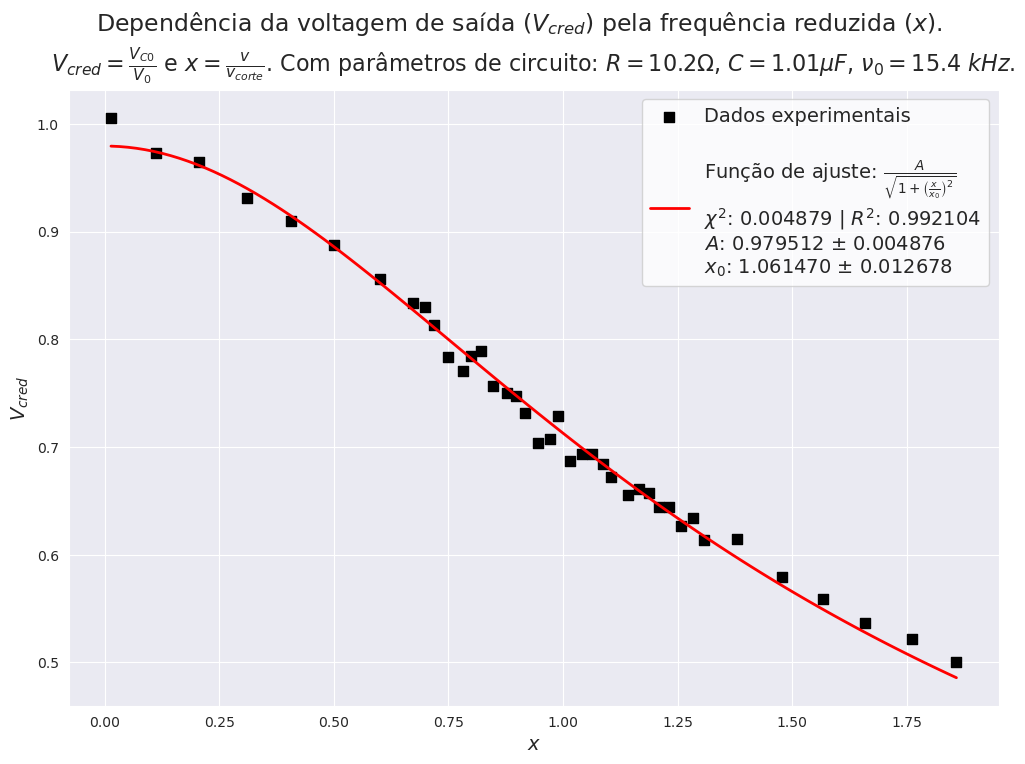

In [26]:
# Função de ajuste para V_cred
def v_cred_fit(x, A, x0):
    return A / np.sqrt(1 + ((x / x0) ** 2))

# Ajuste para V_cred
params_v_cred, pcov_v_cred = curve_fit(v_cred_fit, df_3['x'], df_3['v_cred'], p0=[1, 1])
A_fit, x0_fit = params_v_cred
A_fit_err, x0_fit_err = np.sqrt(np.diag(pcov_v_cred))

# Curva ajustada
x_values = np.linspace(min(df_3['x']), max(df_3['x']), 100)
v_cred_fit_curve = v_cred_fit(x_values, A_fit, x0_fit)

# Cálculo do chi-square e do R-squared
residuals_v_cred = df_3['v_cred'] - v_cred_fit(df_3['x'], *params_v_cred)
chi_square_v_cred = np.sum(residuals_v_cred ** 2)
r_squared_v_cred = 1 - (np.sum(residuals_v_cred ** 2) / np.sum((df_3['v_cred'] - np.mean(df_3['v_cred'])) ** 2))

# Formatar strings para inclusão na legenda
legend_title = '\n' + r'Função de ajuste: $\frac{A}{\sqrt{1 + \left(\frac{x}{x_0}\right)^2}}$'
legend_chi_r = r'$\chi^2$: {:.6f} | $R^2$: {:.6f}'.format(chi_square_v_cred, r_squared_v_cred)
legend_A = r'$A$: {:.6f} $\pm$ {:.6f}'.format(A_fit, A_fit_err)
legend_x0 = r'$x_0$: {:.6f} $\pm$ {:.6f}'.format(x0_fit, x0_fit_err)

legend_text = '\n'.join([legend_title, legend_chi_r, legend_A, legend_x0])

# Plot dos dados e do ajuste
plt.figure(figsize=(12, 8))
plt.suptitle(r'Dependência da voltagem de saída $(V_{{cred}})$ pela frequência reduzida $(x)$.', fontsize=17)
plt.title(r'$V_{{cred}} = \frac{V_{C0}}{V_0}$ e $x = \frac{v}{v_{{corte}}}$.' + fr' Com parâmetros de circuito: $R = {R_chute:.1f} \Omega$, $C = {C_chute:.2f} \mu F$, $\nu_{0} = {v_corte*1000:.1f}\ kHz$.', fontsize=16, y=1.015)
plt.scatter(df_3['x'], df_3['v_cred'], marker='s', s=50, color='black', label='Dados experimentais')
plt.plot(x_values, v_cred_fit_curve, color='red', linestyle='-', label=f'{legend_text}', lw=2)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$V_{{cred}}$', fontsize=14)
plt.legend(facecolor='white', fontsize=14, loc='best')
plt.savefig(path + 'v_cred_versus_x_ajuste' + '.pdf')
plt.show()

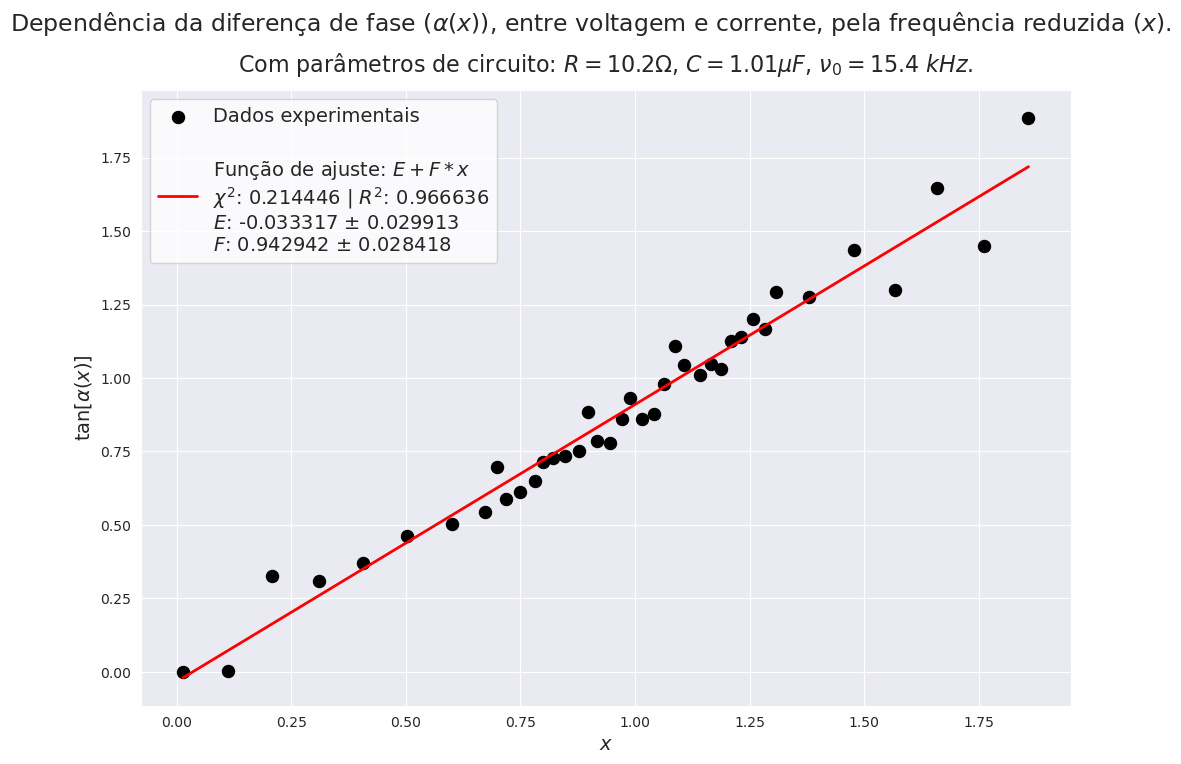

In [27]:
# Função de ajuste linear
def linear_fit(x, E, F):
    return E + F * x

# Ajuste linear para tg(alpha)
params_tg, pcov_tg = curve_fit(linear_fit, df_3['x'], df_3['tg(alpha)'])
E_fit, F_fit = params_tg
E_fit_err, F_fit_err = np.sqrt(np.diag(pcov_tg))

# Curva ajustada
x_values = np.linspace(min(df_3['x']), max(df_3['x']), 100)
tg_alpha_fit = linear_fit(x_values, E_fit, F_fit)

# Cálculo do chi-square e do R-squared
residuals_tg = df_3['tg(alpha)'] - linear_fit(df_3['x'], *params_tg)
chi_square_tg = np.sum(residuals_tg ** 2)
r_squared_tg = 1 - (np.sum(residuals_tg ** 2) / np.sum((df_3['tg(alpha)'] - np.mean(df_3['tg(alpha)'])) ** 2))

# Formatar strings para inclusão na legenda
legend_title = '\n' + r'Função de ajuste: $E + F*x$'
legend_chi_r = r'$\chi^2$: {:.6f} | $R^2$: {:.6f}'.format(chi_square_tg, r_squared_tg)
legend_E = r'$E$: {:.6f} $\pm$ {:.6f}'.format(E_fit, E_fit_err)
legend_F = r'$F$: {:.6f} $\pm$ {:.6f}'.format(F_fit, F_fit_err)

legend_text = '\n'.join([legend_title, legend_chi_r, legend_E, legend_F])

# Plot dos dados e do ajuste
plt.figure(figsize=(12, 8))
plt.suptitle(r'Dependência da diferença de fase $(\alpha (x))$, entre voltagem e corrente, pela frequência reduzida $(x)$.', fontsize=17)
plt.title(fr'Com parâmetros de circuito: $R = {R_chute:.1f} \Omega$, $C = {C_chute:.2f} \mu F$, $\nu_{0} = {v_corte*1000:.1f}\ kHz$.', fontsize=16, y=1.015)
plt.scatter(df_3['x'], df_3['tg(alpha)'], marker='o', s=75, color='black', label='Dados experimentais')
plt.plot(x_values, tg_alpha_fit, color='red', linestyle='-', label=f'{legend_text}', lw=2)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$\tan [\alpha (x)]$', fontsize=14)
plt.legend(facecolor='white', fontsize=14, loc='best')

plt.savefig(path + 'tg_alpha_vs_x_ajuste.pdf')
plt.show()

# Uncertainty calculation

In [52]:
delta_R = 10.2 *.008 + 4 * .1 # Ohms
delta_C = 1.015 * .005 + .001 * 1 # \mu F
delta_V_corte = (v_corte * m.sqrt((delta_R / R_chute) ** 2 + (delta_C * ten_pow(-6) / C_chute * ten_pow(-6)) ** 2)) * 1000 # kHz
print(f'{delta_R=:}')
print(f'{delta_C=:}')
print(f'{delta_V_corte=:}')

delta_R=0.48160000000000003
delta_C=0.006075
delta_V_corte=0.7258388739557997
